# Pile-up algorithm

## Data Conversion

Each event is in the end stored in a column the variables ```si1``` and ```si2```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
si1 = np.loadtxt("sipm1data0.csv", delimiter = ",")
si2 = np.loadtxt("sipm2data0.csv", delimiter = ",")
tbase = np.loadtxt("tbase.csv", delimiter = ",")

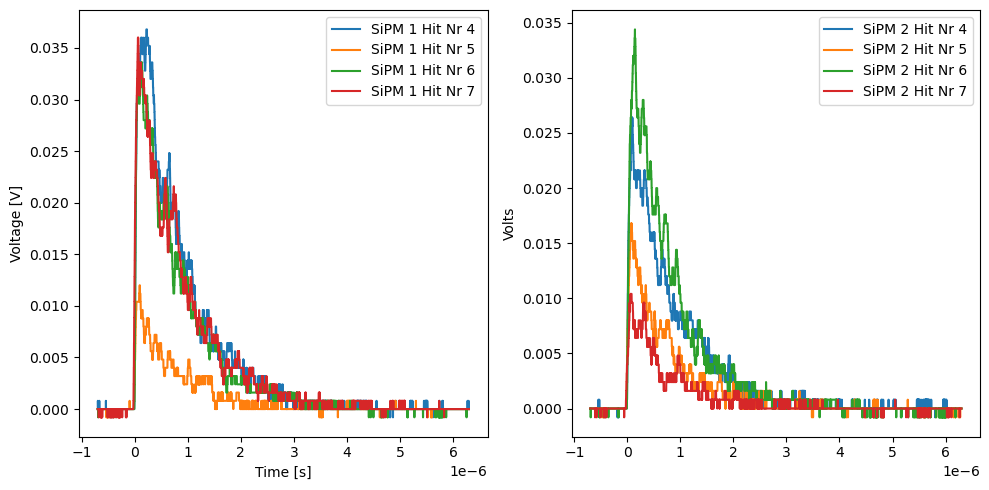

In [6]:
evlow = 4
evhigh = 8
plt.figure(figsize = (10, 5))
plt.subplot(121)
for i in range(evlow, evhigh):
    plt.plot(tbase, si1[i], label = "SiPM 1 Hit Nr " + str(i))
plt.ylabel("Voltage [V]")
plt.xlabel("Time [s]")
plt.legend()
plt.subplot(122)
for i in range(evlow, evhigh):
    plt.plot(tbase, si2[i], label = "SiPM 2 Hit Nr " + str(i))
plt.ylabel("Volts")
plt.legend()
plt.tight_layout()
plt.show()

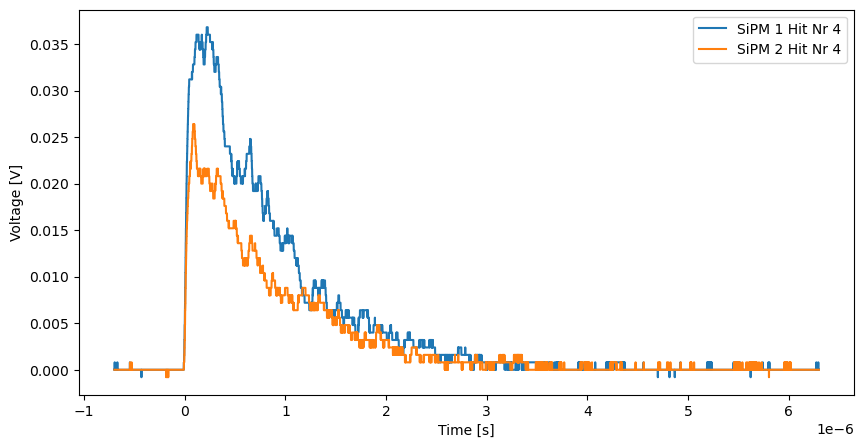

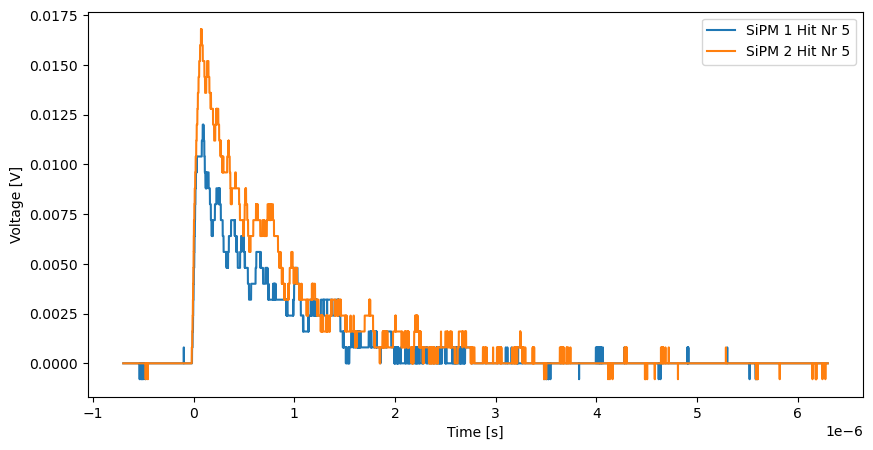

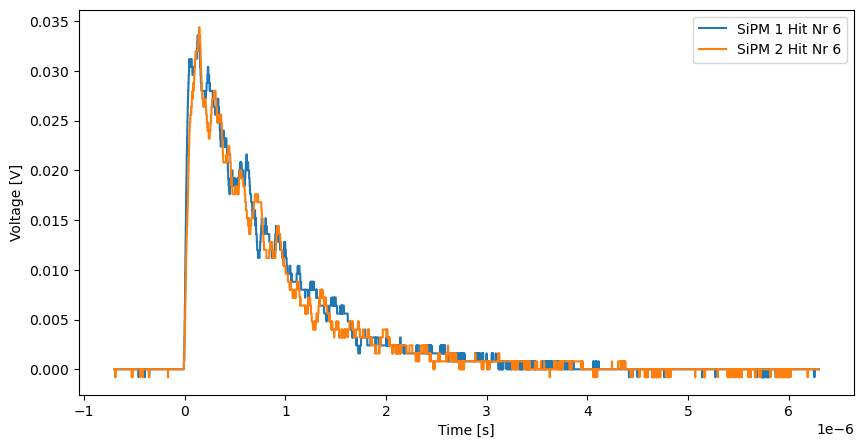

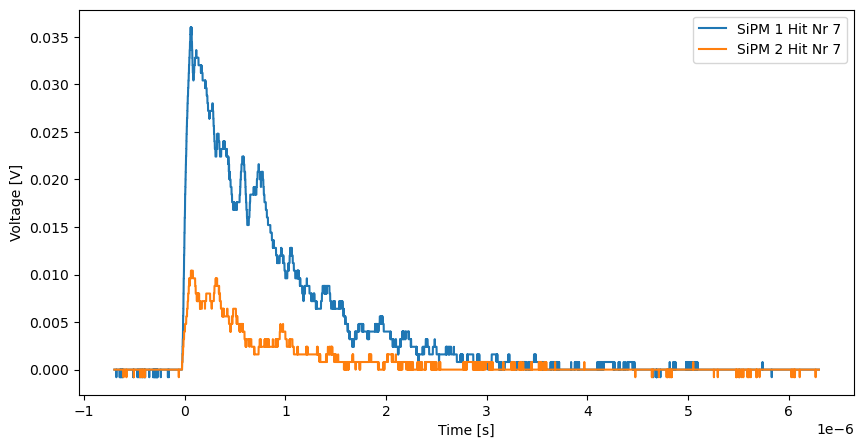

In [7]:
for i in range(evlow, evhigh):
    plt.figure(figsize = (10, 5))
    plt.plot(tbase, si1[i], label = "SiPM 1 Hit Nr " + str(i))
    plt.plot(tbase, si2[i], label = "SiPM 2 Hit Nr " + str(i))
    plt.ylabel("Voltage [V]")
    plt.xlabel("Time [s]")
    plt.legend()
    plt.show()

## Scintillator Pileup estimation

- Take worst-case scenario in which all activity is concentrated in one point
- Occupancy $\frac{\text{Gammas per pxl}}{\text{Total Gammas}}\leq 0.002$
- Activity typically 350 MBq, but take the typical integration time of CsI of 1ms $\Rightarrow 700 \gamma/s$
- Take into account integrated body attenuation $\eta = 0.14$

In [9]:
activity = 350e6
inttime = 1e-6
occ = 0.002
attenuation = 0.14
scipileup = activity * inttime * occ * attenuation * 2 
print(round(scipileup, 1), "Gammas/us")

0.2 Gammas/us


In [10]:
ly = 3e4#gamma/MeV
e = 0.511#
qe = 0.18
sipmpileup = scipileup * ly * e * qe
print(round(sipmpileup, 1), "Gammas/us")

540.8 Gammas/us
